In [44]:
import mne
import numpy as np
import matplotlib.pyplot as plt

## 1. 生成随机数据来构建Raw类

Creating RawArray with float64 data, n_channels=5, n_times=1000
Current compensation grade : 0
    Range : 0 ... 999 =      0.000 ...     9.990 secs
Ready.
<RawArray  |  None, n_channels x n_times : 5 x 1000 (10.0 sec), ~56 kB, data loaded>


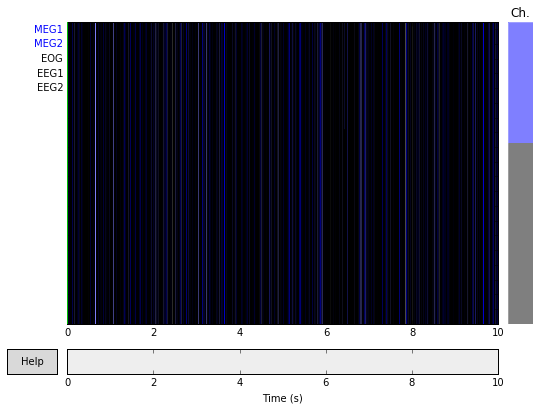

In [5]:
# Generate some random data
data = np.random.randn(5, 1000)

# Initialize an info structure
info = mne.create_info(
    ch_names=['MEG1', 'MEG2', 'EEG1', 'EEG2', 'EOG'],
    ch_types=['grad', 'grad', 'eeg', 'eeg', 'eog'],
    sfreq=100    # print(raw.info['sfreq'])
)

custom_raw = mne.io.RawArray(data, info)
print(custom_raw)
custom_raw.plot();

## 2.使用pick_type和read_selection方式自定义构建Raw类

In [13]:
import mne
from mne.datasets import sample
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_raw.fif'
raw = mne.io.read_raw_fif(raw_fname)
print(raw)
print("sfreq:",raw.info['sfreq'])

Opening raw data file /home/reallocing/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0
<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 166800 (277.7 sec), ~3.8 MB, data not loaded>
('sfreq:', 600.614990234375)


In [31]:
## 根据ch_names后缀来判断ch_types
## MEG **1:表示mag； MEG **2 or **3表示grad
def ch_names_to_types(ch_names):
    ch_types = []
    for ch in ch_names:
        _ch = int(ch[-1:])
        if _ch == 1:
            ch_types.append('mag')
        if _ch == 2 or _ch == 3:
            ch_types.append('grad')
    return ch_types

['MEG 1311', 'MEG 1312', 'MEG 1313', 'MEG 1321', 'MEG 1322', 'MEG 1323', 'MEG 1331', 'MEG 1332', 'MEG 1333', 'MEG 1341', 'MEG 1342', 'MEG 1343', 'MEG 1421', 'MEG 1422', 'MEG 1423', 'MEG 1431', 'MEG 1432', 'MEG 1433', 'MEG 1441', 'MEG 1442', 'MEG 1443', 'MEG 2411', 'MEG 2412', 'MEG 2413', 'MEG 2421', 'MEG 2422', 'MEG 2423', 'MEG 2611', 'MEG 2612', 'MEG 2613', 'MEG 2621', 'MEG 2622', 'MEG 2623', 'MEG 2631', 'MEG 2632', 'MEG 2633', 'MEG 2641', 'MEG 2642', 'MEG 2643']
('ch_types:', ['mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad'])


('ch_names', ['MEG 1311', 'MEG 1312', 'MEG 1313', 'MEG 1321', 'MEG 1322', 'MEG 1323', 'MEG 1331', 'MEG 1332', 'MEG 1333', 'MEG 1341', 'MEG 1342', 'MEG 1343', 'MEG 1421', 'MEG 1422', 'MEG 1423', 'MEG 1431', 'MEG 1432', 'MEG 1433', 'MEG 1441', 'MEG 1442', 'MEG 1443', 'MEG 2411', 'MEG 2412', 'MEG 2413', 'MEG 2421', 'MEG 2422', 'MEG 2423', 'MEG 2611', 'MEG 2612', 'MEG 2613', 'MEG 2621', 'MEG 2622', 'MEG 2623', 'MEG 2631', 'MEG 2632', 'MEG 2633', 'MEG 2641', 'MEG 2642', 'MEG 2643'])
('ch_types:', ['mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad', 'mag', 'grad', 'grad'])
Creating RawArray with float64 data, n_channels=39, n_times=166800
Current compensation grade : 0
    Range : 0 ... 166799 =      0.000 ...   277.714 secs
Ready.


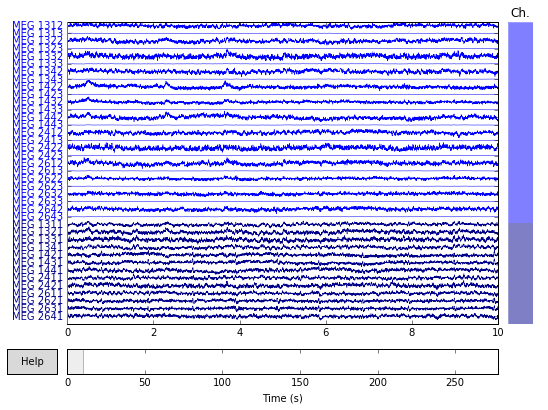

In [48]:
selection = mne.read_selection('Right-temporal')

ch_names = selection
ch_types = ch_names_to_types(ch_names)
print("ch_names",ch_names)
print("ch_types:",ch_types) #"kind must be one of ['ecg', 'bio', 'hbo', 'stim', 'eog', 'emg', 'ref_meg', 'misc', 'ecog', 'seeg', 'mag', 'eeg', 'grad', 'hbr']

sfreq = raw.info['sfreq']
picks = mne.pick_types(raw.info,meg=True,eeg=False,eog=False,
                      stim=False,selection=selection)
data, _ = raw[picks] 
info = mne.create_info(
    ch_names=ch_names,
    ch_types=ch_types,
    sfreq=sfreq
)

custom_raw = mne.io.RawArray(data, info)
custom_raw.plot(n_channels=39,scalings='auto');

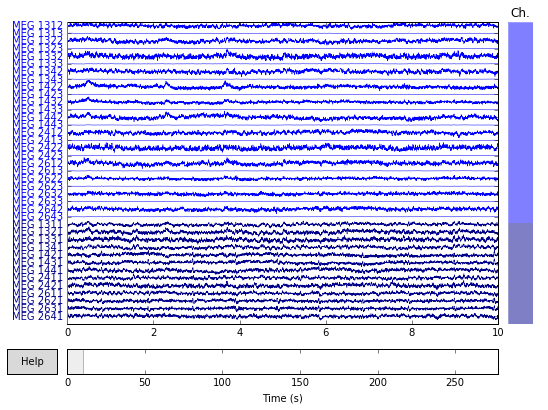

In [51]:
fig = mne.viz.plot_raw(custom_raw,n_channels=39,scalings='auto');
plt.savefig('custom_raw_plot.png') # 注意，放在这会保存为空白图片，需要将所有代码规整到py文件下运行，即可正常保存